In [1]:
# !git clone https://github.com/vincentnam/ProjetInterpromo2020G8.git

In [1]:
from abc import ABCMeta, abstractmethod
from typing import Iterable

import numpy as np
from pipeline import Process, Preprocess, Postprocess, Pipeline, overrides, MetaProcess, NotProcessClass


import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
from collections import defaultdict
from PIL import Image

from matplotlib import image
import matplotlib.patches as mpatches
from skimage import io
import skimage.segmentation as seg
from skimage.segmentation import clear_border
import skimage.filters as filters
from skimage.filters import threshold_otsu
import skimage.draw as draw
import skimage.color as color
from skimage.color import label2rgb
from skimage.measure import label, regionprops
from skimage.morphology import closing, square


from skimage.measure import label, regionprops
import numpy as np
import pandas as pd
import os
import cv2 as cv2

from matplotlib import pyplot as plt
from matplotlib import image
import matplotlib.patches as mpatches

from skimage import io
import skimage.segmentation as seg
from skimage.segmentation import clear_border
import skimage.filters as filters
from skimage.filters import threshold_otsu
import skimage.draw as draw
import skimage.color as color
from skimage.color import label2rgb
from skimage.measure import label, regionprops
from skimage.morphology import closing, square

In [3]:
from pipeline import BlackWhite, SeatFinder, RemoveDouble, ColourPipelineZones, SegmentationZone

In [4]:
pipeline = Pipeline("../M2_DATA_PIPELINE/",["Aer_Lingus_Airbus_A330-300_A_plane6.jpg"])
pipeline.add_processes([BlackWhite,SeatFinder])

OpenCV4.1.2.30 -> rgb to grey a été ajouté.
OpenCV4.1.2.30 -> Pattern Matching seat a été ajouté.


OpenCV4.1.2.30 -> rgb to grey
OpenCV4.1.2.30 -> Pattern Matching seat


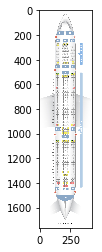

Début du pipeline : 
Preprocess :  OpenCV4.1.2.30 -> rgb to grey
Doing : OpenCV4.1.2.30 -> rgb to grey


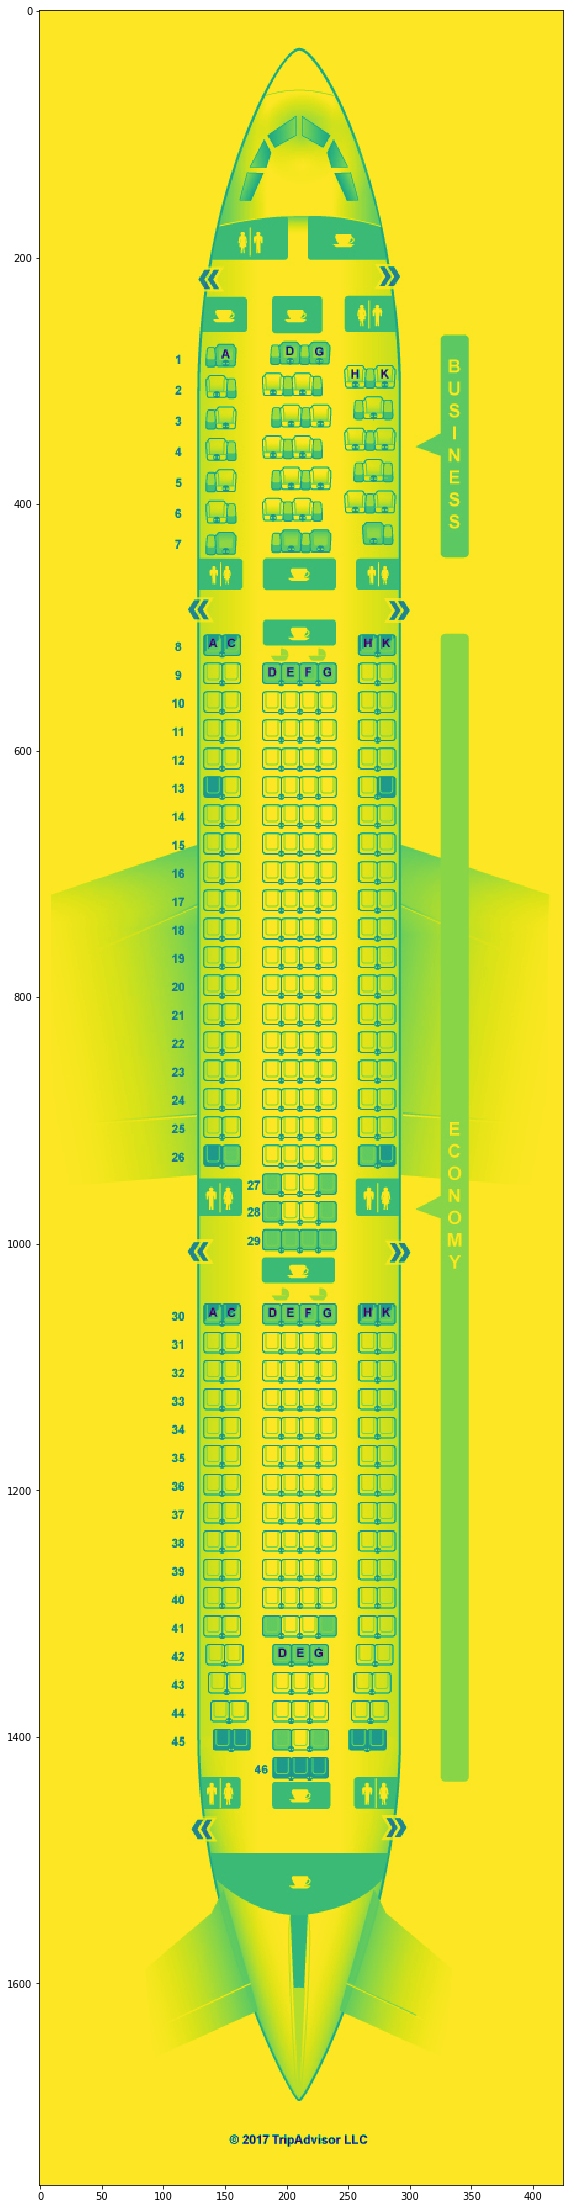

Process :  OpenCV4.1.2.30 -> Pattern Matching seat
Doing : OpenCV4.1.2.30 -> Pattern Matching seat


In [5]:
pipeline.run_pipeline(1, planes_data_csv=None, plane_name="Aer_Lingus_Airbus_A330-300_A_plane6.jpg", csv_data_path="/data/dataset/projetinterpromo/Interpromo2020")

Standard Python >= 3.5 -> preprocess colours a été ajouté.
OpenCV4.1.2.30 -> rgb to grey a été ajouté.
OpenCV4.1.2.30 / Scikit-image 0.16-> segmentation over colour areas a été ajouté.
Standard Python >= 3.5 -> preprocess colours
OpenCV4.1.2.30 -> rgb to grey
OpenCV4.1.2.30 / Scikit-image 0.16-> segmentation over colour areas


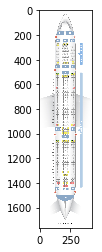

Début du pipeline : 
Preprocess :  Standard Python >= 3.5 -> preprocess colours
Doing : Standard Python >= 3.5 -> preprocess colours


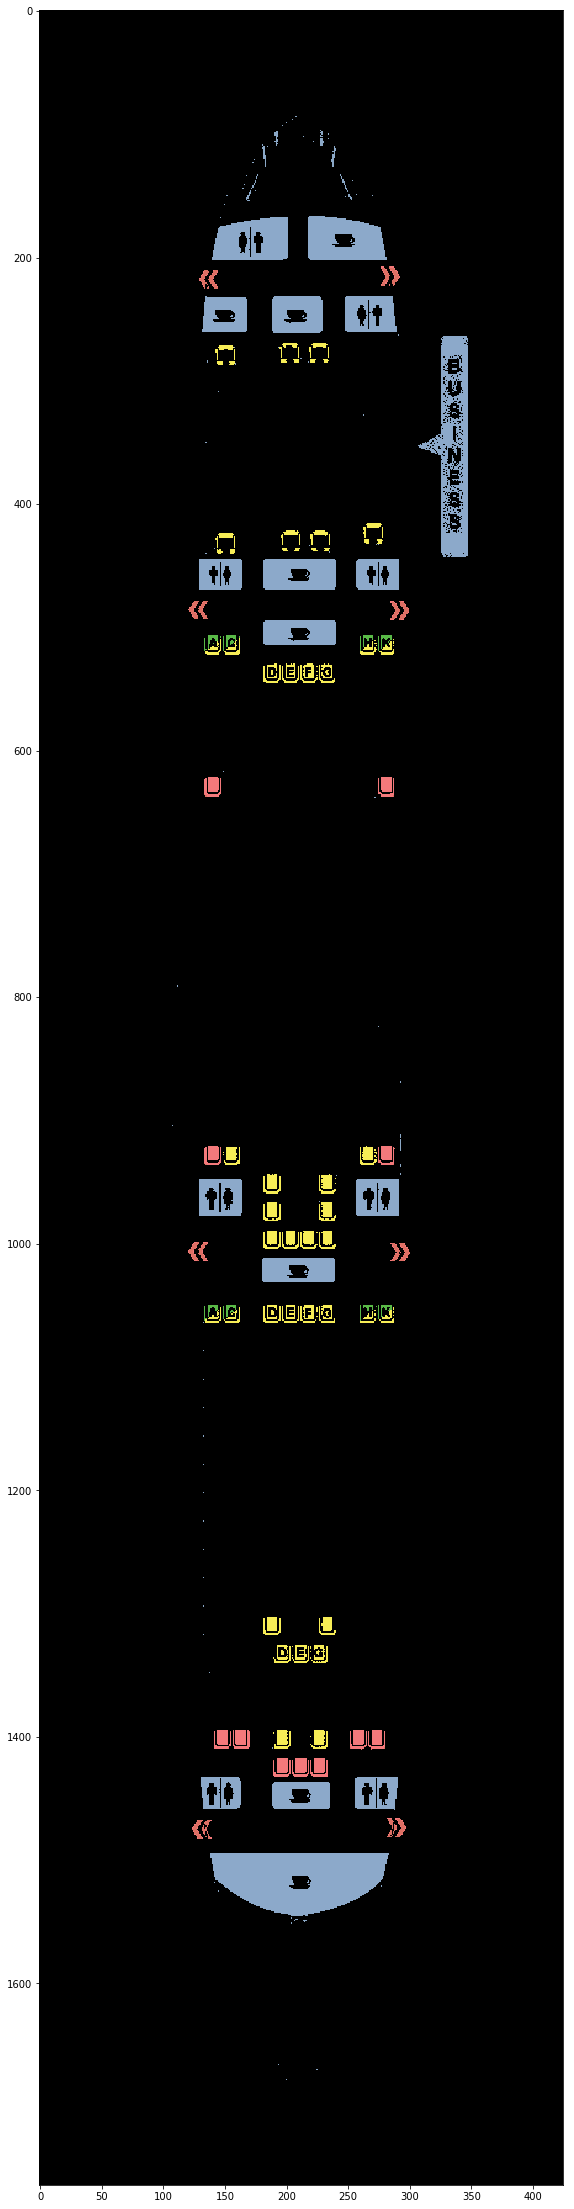

Preprocess :  OpenCV4.1.2.30 -> rgb to grey
Doing : OpenCV4.1.2.30 -> rgb to grey


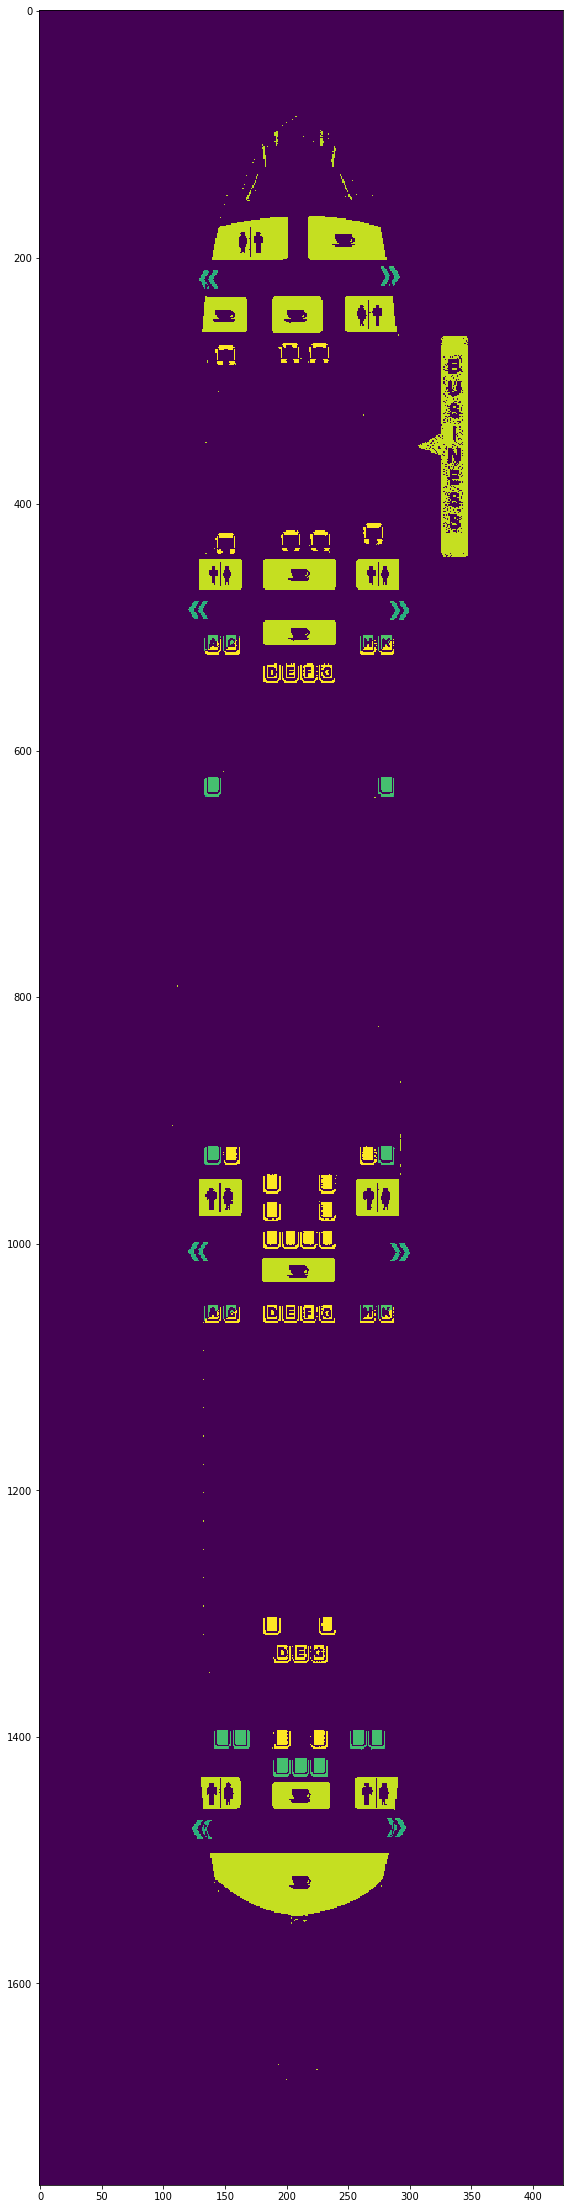

Process :  OpenCV4.1.2.30 / Scikit-image 0.16-> segmentation over colour areas
Doing : OpenCV4.1.2.30 / Scikit-image 0.16-> segmentation over colour areas


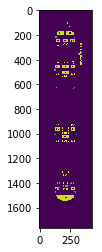

['sortie_gauche.png', 'sortie_gauche (2).png', 'sortie_droit.png', 'toilettes_2.png', 'bar5.png', 'bar4.png', 'sortie_droit (2).png']


In [6]:
pipeline_zone = Pipeline("../M2_DATA_PIPELINE/",["Aer_Lingus_Airbus_A330-300_A_plane6.jpg"])

pipeline_zone.add_processes([ColourPipelineZones, BlackWhite, SegmentationZone])
pipeline_zone.run_pipeline(1)

In [8]:
from gensim.parsing.preprocessing import strip_numeric, strip_non_alphanum
def merge_elements(json_zone):
    merge_dictio = {}
    for k in json_zone.keys():
        for el in json_zone[k].keys():
            merge_dictio[strip_non_alphanum(strip_numeric(el.split('.')[0]))] = []
    
    keys = merge_dictio.keys()
    for k in json_zone.keys():
        for el in json_zone[k].keys():
            for merge_key in merge_dictio.keys():
                if merge_key in el:
                    merge_dictio[merge_key]+= json_zone[k][el]
                merge_dictio[merge_key] = list( dict.fromkeys(merge_dictio[merge_key]) )
    return json_zone, merge_dictio
    
merge_elements(pipeline_zone.json)

({'Aer_Lingus_Airbus_A330-300_A_plane6.jpg': {'sortie_gauche.png': [],
   'sortie_gauche (2).png': [],
   'sortie_droit.png': [],
   'toilettes_2.png': [(167, 218, 203, 282),
    (168, 140, 203, 202),
    (1495, 139, 1548, 284)],
   'bar5.png': [(167, 218, 203, 282),
    (232, 132, 261, 169),
    (232, 189, 262, 230),
    (445, 130, 470, 165),
    (445, 182, 470, 241),
    (445, 257, 470, 292),
    (1437, 189, 1459, 236),
    (1495, 139, 1548, 284)],
   'bar4.png': [(167, 218, 203, 282),
    (232, 132, 261, 169),
    (232, 189, 262, 230),
    (445, 182, 470, 241),
    (495, 182, 515, 241),
    (1012, 181, 1032, 240),
    (1437, 189, 1459, 236),
    (1495, 139, 1548, 284)],
   'sortie_droit (2).png': []}},
 {'sortie_gauche': [],
  'sortie_gauche   ': [],
  'sortie_droit': [],
  'toilettes_': [(167, 218, 203, 282),
   (168, 140, 203, 202),
   (1495, 139, 1548, 284)],
  'bar': [(167, 218, 203, 282),
   (232, 132, 261, 169),
   (232, 189, 262, 230),
   (445, 130, 470, 165),
   (445, 182, 4

In [ ]:
list(pipeline_zone.json.keys())[0]

In [9]:
pipeline.json

{'Aer_Lingus_Airbus_A330-300_A_plane6.jpg': {'BUSINESS': [(205, 345, 20, 18),
   (205, 396, 20, 18),
   (205, 294, 20, 18),
   (181, 345, 20, 18),
   (181, 294, 20, 18),
   (181, 396, 20, 18),
   (248, 339, 20, 18),
   (135, 296, 20, 18),
   (196, 320, 20, 18),
   (135, 347, 20, 18),
   (263, 364, 20, 18),
   (262, 364, 20, 18),
   (136, 296, 20, 18),
   (136, 347, 20, 18),
   (143, 372, 20, 18),
   (248, 389, 20, 18),
   (135, 398, 20, 18),
   (263, 313, 20, 18),
   (272, 339, 20, 18),
   (196, 370, 20, 18),
   (262, 313, 20, 18),
   (248, 390, 20, 18),
   (219, 320, 20, 18),
   (136, 398, 20, 18),
   (196, 371, 20, 18),
   (271, 339, 20, 18),
   (142, 372, 20, 18),
   (219, 370, 20, 18),
   (143, 321, 20, 18),
   (195, 320, 20, 18),
   (272, 389, 20, 18),
   (182, 345, 20, 18),
   (272, 390, 20, 18),
   (181, 294, 20, 18),
   (205, 294, 20, 18),
   (181, 345, 20, 18),
   (205, 345, 20, 18),
   (135, 296, 20, 18),
   (262, 313, 20, 18),
   (135, 347, 20, 18),
   (181, 396, 20, 18),
  

In [16]:
coucou = DistPipeline()

coucou.run_pipeline(pipeline.json, pipeline_zone.json)

KeyError: 'rectangles'